In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style("dark")

In [2]:
cd Desktop/

C:\Users\ADENIYI\Desktop


In [3]:
supply = pd.read_csv("Africa Food Supply (2004 - 2013).csv")
production = pd.read_csv("Africa Food Production (2004 - 2013).csv")

In [4]:
supply.head()

,Country,Year,Value
0,Algeria,2004,2987
1,Algeria,2005,2958
2,Algeria,2006,3047
3,Algeria,2007,3041
4,Algeria,2008,3048


In [5]:
supply.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450 entries, 0 to 449
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Country  450 non-null    object
 1   Year     450 non-null    int64 
 2   Value    450 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 10.7+ KB


In [6]:
production.head()

,Country,Item,Year,Value
0,Algeria,Wheat and products,2004,2731
1,Algeria,Wheat and products,2005,2415
2,Algeria,Wheat and products,2006,2688
3,Algeria,Wheat and products,2007,2319
4,Algeria,Wheat and products,2008,1111


In [7]:
production.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23110 entries, 0 to 23109
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Country  23110 non-null  object
 1   Item     23110 non-null  object
 2   Year     23110 non-null  int64 
 3   Value    23110 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 722.3+ KB


In [8]:
production.groupby(["Country","Item","Year"]).sum()

Value
Country  Item                Year       
Algeria  Apples and products 2004    165
                             2005    200
                             2006    283
                             2007    190
                             2008    261
...                                  ...
Zimbabwe Wine                2009      2
                             2010      2
                             2011      2
                             2012      2
                             2013      2

[23110 rows x 1 columns]

In [9]:
production.nunique()

Country      45
Item         94
Year         10
Value      2134
dtype: int64

In [11]:
production_sort = production.groupby(["Country","Year"]).sum().sort_values(by= "Value",ascending=False).reset_index()

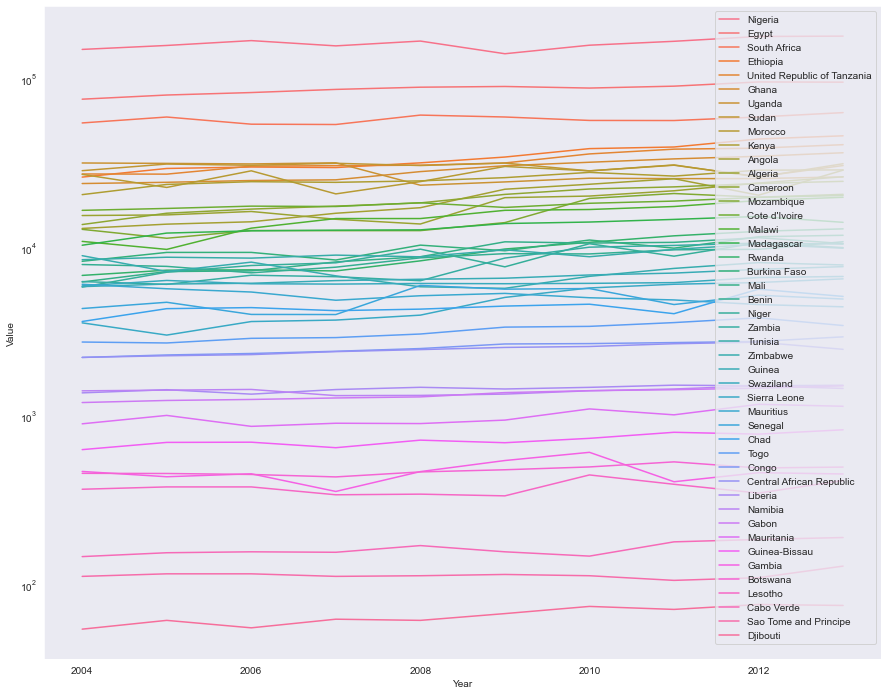

In [12]:
plt.figure(figsize=(15,12))
sns.lineplot(data=production_sort, x="Year", y="Value", hue="Country")
plt.yscale(value="log")
plt.legend(loc="upper right")

In [14]:
unique_country= production["Country"].unique()


In [15]:
from geopy.geocoders import Nominatim
from geopy.exc import GeocoderTimedOut
import numpy as np
# Initialize Nominatim API
countries_obj= []
def set_lat_long(Country):
    try:
        geolocator = Nominatim(user_agent="pattrn")
        return geolocator.geocode(Country) 
    except GeocoderTimedOut:   
        return findGeocode(city)
    
for val in unique_country:
    if  set_lat_long(val) != None:
        location = set_lat_long(val)
        name= val
        lat=location.latitude
        long=location.longitude
        countries_obj.append({"Country":name,"lat":lat,"long":long})
    else:
        name= val
        lat=np.nan
        long=np.nan
        countries_obj.append({"Country":name,"lat":lat,"long":long})
        

In [18]:
country_geo= pd.DataFrame(countries_obj)

production_geo= production.merge(country_geo,how="left", on="Country")

production_geo.head()

,Country,Item,Year,Value,lat,long
0,Algeria,Wheat and products,2004,2731,28.000027,2.999983
1,Algeria,Wheat and products,2005,2415,28.000027,2.999983
2,Algeria,Wheat and products,2006,2688,28.000027,2.999983
3,Algeria,Wheat and products,2007,2319,28.000027,2.999983
4,Algeria,Wheat and products,2008,1111,28.000027,2.999983


In [19]:
supply_geo= supply.merge(country_geo, how="left", on="Country")

In [ ]:
production_geo.to_csv("production2.csv")

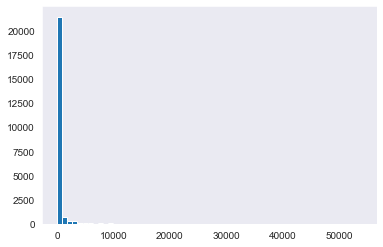

In [24]:
plt.hist(x=production_geo["Value"], bins=60);

<AxesSubplot:xlabel='Year', ylabel='Value'>

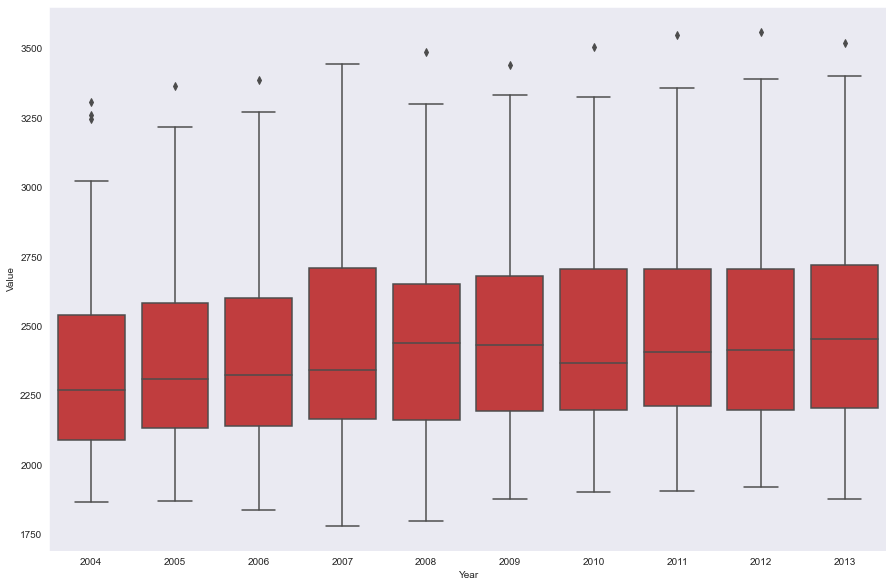

In [30]:
plt.figure(figsize=(15,10))
color = sns.color_palette()[3]
sns.boxplot(data=supply_geo, x="Year", y="Value", color=color)

In [31]:
import numpy as np
supply_2012= supply.query("Year==2012")
Q1 = np.percentile(supply_2012['Value'], 25,
                   method = 'midpoint')
 
Q3 = np.percentile(supply_2012['Value'], 75,
                   method= 'midpoint')
IQR = Q3 - Q1


In [32]:
upper = Q3+(1.5*IQR)
supply_2012.query("Value>{}".format(upper))

,Country,Year,Value
128,Egypt,2012,3561


In [33]:
production.Item.unique()

array(['Wheat and products', 'Rice (Milled Equivalent)',
       'Barley and products', 'Maize and products', 'Oats',
       'Sorghum and products', 'Cereals, Other', 'Potatoes and products',
       'Sugar beet', 'Sugar (Raw Equivalent)', 'Honey', 'Beans', 'Peas',
       'Pulses, Other and products', 'Nuts and products',
       'Groundnuts (Shelled Eq)', 'Sunflower seed',
       'Rape and Mustardseed', 'Cottonseed',
       'Olives (including preserved)', 'Groundnut Oil',
       'Sunflowerseed Oil', 'Rape and Mustard Oil', 'Olive Oil',
       'Oilcrops Oil, Other', 'Tomatoes and products', 'Onions',
       'Vegetables, Other', 'Oranges, Mandarines',
       'Lemons, Limes and products', 'Grapefruit and products',
       'Citrus, Other', 'Bananas', 'Apples and products', 'Dates',
       'Grapes and products (excl wine)', 'Fruits, Other', 'Pimento',
       'Wine', 'Beer', 'Beverages, Alcoholic', 'Bovine Meat',
       'Mutton & Goat Meat', 'Pigmeat', 'Poultry Meat', 'Meat, Other',
       'Of

Text(0.5, 1.0, 'Top 10 rice producing countries from 2004 to 2013')

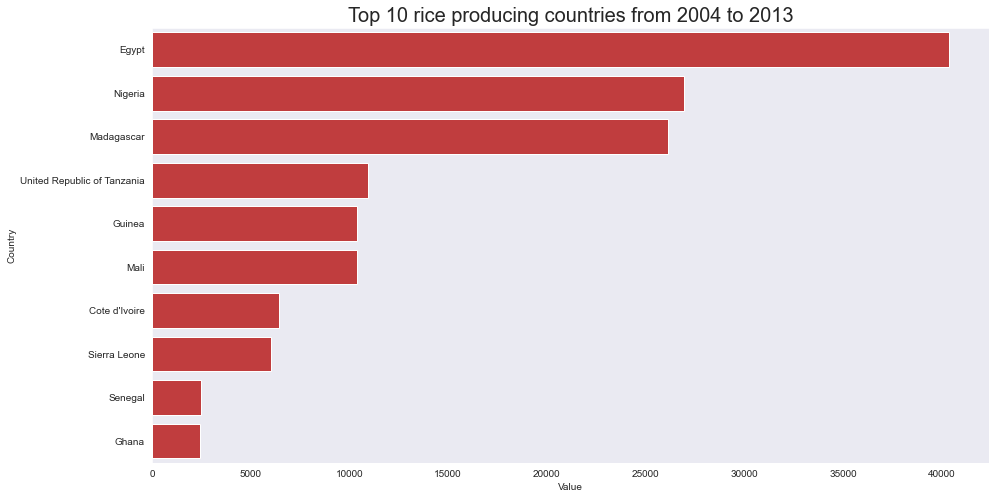

In [60]:
rice_production= production_geo.query("Item=='Rice (Milled Equivalent)'").sort_values(by="Value", ascending=False)

rice_production_by_country = rice_production.groupby("Country").sum().sort_values(by="Value", ascending=False)["Value"].head(10).reset_index()
plt.figure(figsize=(15,8))

sns.barplot(data=rice_production_by_country,y="Country", x="Value", orient="h", errwidth=None, color=color)
plt.title("Top 10 rice producing countries from 2004 to 2013",fontdict={"size":20})

In [66]:
import plotly.express as px

# Group the data by country and calculate the total production of each item
country_item_df = production_geo.groupby(['Country']).agg({'Value': 'sum'}).reset_index()

# Calculate the total production of each item across all countries
# total_item_df = country_item_df.groupby(['Item']).agg({'Value': 'sum'}).reset_index()

# Merge the total item production with the latitude and longitude data
merged_df = pd.merge(country_item_df, production_geo[['Country', 'lat', 'long']], on='Country', how='left')
# Define a custom color scale
colors = ['#2a6f97', '#014f86', '#01497c', '#013a63', '#012a4a']
# Plot a map of the total item production per country
fig = px.scatter_geo(merged_df, lat='lat', lon='long', size='Value', color='Value', hover_name='Country', projection='natural earth', scope='africa', color_continuous_scale=colors, range_color=(0, merged_df['Value'].max()))
# Set the background style of the map to 'carto-darkmatter'
fig.update_layout(geo=dict(bgcolor='black', showocean=True, oceancolor='#d8f3dc', showland=True, landcolor='#2d6a4f', showcountries=True, countrycolor='gray'), height= 600, width= 900, title="Map of african countries based on production")
fig.show()


In [68]:


# Group the data by the name of the item produced and sum the values of item in kilotonne column to get the total production of each item across all years
item_production_df = production_geo.groupby('Item')['Value'].sum().reset_index()

# Sort the data by the total production of each item in descending order
item_production_df = item_production_df.sort_values(by='Value', ascending=False).head(10)

# Plot a bar chart of the total production of each item across all years
fig = px.bar(item_production_df, x='Item', y='Value', text="Value",text_auto=".2s", title="Top 10 item produced in Africa")
fig.update_layout(yaxis=dict(tickvals=[]), font=dict(size=18))
fig.show()


In [79]:
supply_geo.groupby("Country")["Value"].sum().reset_index().sort_values(by="Value", ascending=False)

,Country,Value
12,Egypt,34580
40,Tunisia,33055
27,Morocco,32967
0,Algeria,31118
26,Mauritius,30543
36,South Africa,29629
16,Ghana,29180
10,Cote d'Ivoire,27666
24,Mali,27502
25,Mauritania,27443


In [70]:
# Group the data by country and calculate the total supply of each item
country_item_df = supply_geo.groupby(['Country']).agg({'Value': 'sum'}).reset_index()

# Calculate the total production of each item across all countries
# total_item_df = country_item_df.groupby(['Item']).agg({'Value': 'sum'}).reset_index()

# Merge the total item production with the latitude and longitude data
merged_df = pd.merge(country_item_df, supply_geo[['Country', 'lat', 'long']], on='Country', how='left')
# Define a custom color scale
colors = ['#2a6f97', '#014f86', '#01497c', '#013a63', '#012a4a']
# Plot a map of the total item production per country
fig = px.scatter_geo(merged_df, lat='lat', lon='long', size='Value', color='Value', hover_name='Country', projection='natural earth', scope='africa', color_continuous_scale=colors, range_color=(0, merged_df['Value'].max()))
# Set the background style of the map to 'carto-darkmatter'
fig.update_layout(geo=dict(bgcolor='black', showocean=True, oceancolor='#d8f3dc', showland=True, landcolor='#2d6a4f', showcountries=True, countrycolor='gray'), height= 600, width= 900, title="Map of african countries based on supply")
fig.show()

## Insight
- Egypt is the top *producing* and *consuming* country
- Also Egypt is the Top rice producing country in africa
- Nigeria is also import in the economy of africa as they at also the second most producing in african and second rice producing country in africa
- Cassave, Sugar Cane and Maize are the top producing food in africa
- Top consuming countries are majorly from the north africa in the likes of *Egypt*, *Tunisia*, *Algeria* and *Morocco*